In machine learning, a Bayes classifier is a simple probabilistic classifier, which is based on applying Bayes' theorem. The feature model used by a naive Bayes classifier makes strong independence assumptions. This means that the existence of a particular feature of a class is independent or unrelated to the existence of every other feature.

Definition of independent events:
Two events E and F are independent, if both E and F have positive probability and if P(E|F) = P(E) and P(F|E) = P(F)

Conditional Probability-----------------------------------------------

P(A|B) stands for "the conditional probability of A given B", or "the probability of A under the condition B", i.e. the probability of some event A under the assumption that the event B took place

Example

There are about 8.4 million people living in Switzerland. About 64 % of them speak German. There are about 7500 million people on earth.

If some aliens randomly beam up an earthling, what are the chances that he is a German speaking Swiss?

We have the events

S: being Swiss

GS: German Speaking

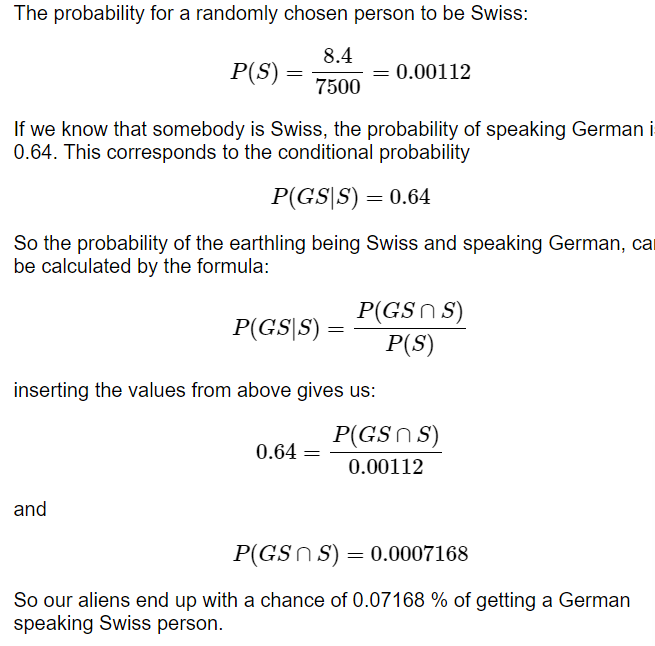

In [1]:
probfromswiss=8.4/(1.0*7500)

Probgettingswissgerman=probfromswiss=0.64*probfromswiss
print(Probgettingswissgerman)

0.0007168000000000001


False Positives and False Negatives----------------------------------------------------------------

A medical research lab proposes a screening to test a large group of people for a disease. An argument against such screenings is the problem of false positive screening results.

Suppose 0,1% of the group suffer from the disease, and the rest is well:

p("sick")=0.1

p("well")=99.9

If you have the disease, the test will be positive 99% of the time, and if you don't have it, the test will be negative 99% of the time
Finally, suppose that when the test is applied to a person having the disease, there is a 1% chance of a false negative result (and 99% chance of getting a true positive result), i.e.

P("test positive" | "well") = 1 %

and

P("test negative" | "well") = 99 %.


P("test negative" | "sick") = 1 %

and

P("test positive" | "sick") = 99 %

N=10000
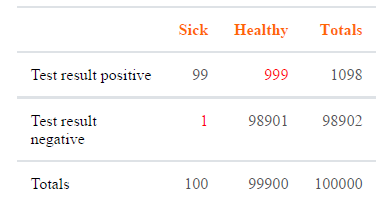

Bayes Theorem---------------------------------------------------------------------------------

We've calculated the probability of P(GS|S) earlier which was the probability of a swiss that speaks german. With following equation:

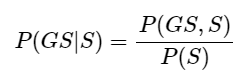

What about if we calculate the probability of P(S|GS). The probability of somebody is swiss under the assumption that the person speaks german.
Here's the following equation:
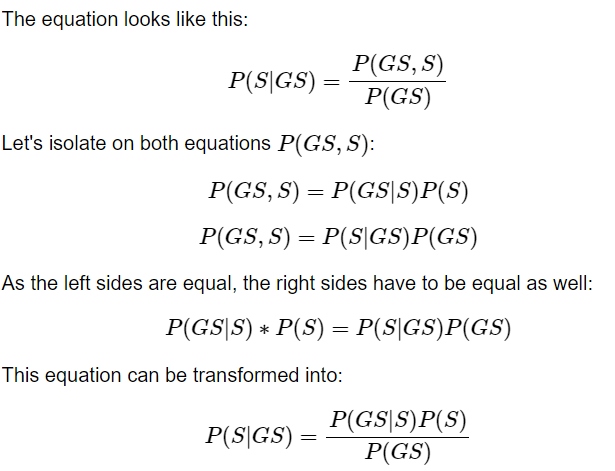

The result's a correspont to bayes' theorem

Answer:
We already knew that
P(GS|S)=0.64
and 
P(S) = 0.00112

based from the internet, german native speakers weighted at 101 millions. So we know that
the probability of a person that speaks german is:
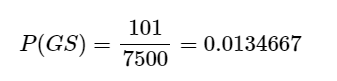

Finally, we can calculate P(S|GS)  by substituting the values in our equation:
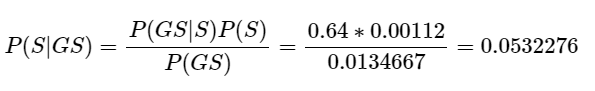

There are about 8.4 million people living in Switzerland. About 64 % of them speak German. There are about 7500 million people on earth.
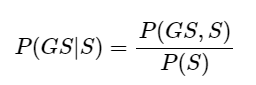

Exercise by using a dummy dataset from Munich train schedule

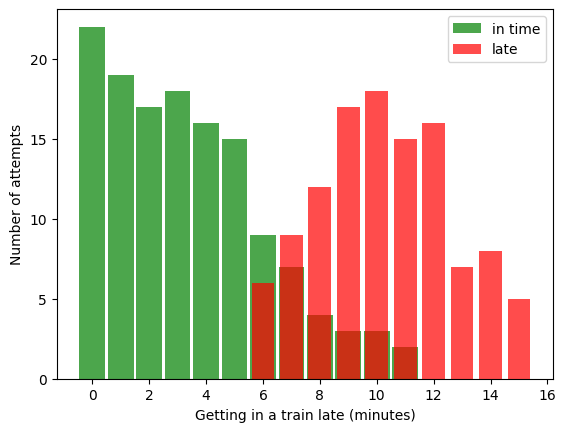

In [18]:
#Start coding from here mate!

import matplotlib.pyplot as plt

#Tuple consisted of (delay time of train, number of times)
in_time = [(0, 22), (1, 19), (2, 17), (3, 18), (4, 16), (5, 15), (6, 9), (7, 7), (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17),(10, 18), (11, 15), (12,16), (13, 7),(14, 8), (15, 5)]

if __name__ == "__main__":
    x1, y1=zip(*in_time)
    x2, y2=zip(*too_late)
    
    plt.bar(x1, y1, 0.9, color="green", alpha=0.7, label="in time")
    plt.bar(x2,y2, 0.8, color="red", alpha= 0.7, label= "late")
    plt.legend(loc="upper right")
    plt.xlabel("Getting in a train late (minutes)")
    plt.ylabel("Number of attempts")
    plt.show()

From the data above, we can deduce that:

    a. If you're late within below 6 minutes. 100% you'll still manage to hop in the train
    1=P(S|1)=P(S|2)=P(S|3)=P(S|4)=P(S|5)

    b. If you're 6 minutes late, your chances are still 60%
    P(S|6)= 9/9 + 6 = 0.6

In [20]:
#We can create a classifier function which will given the probability for catchin the train

in_time = [(0, 22), (1, 19), (2, 17), (3, 18), (4, 16), (5, 15), (6, 9), (7, 7), (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17),(10, 18), (11, 15), (12,16), (13, 7),(14, 8), (15, 5)]

in_time_dict = dict(in_time)
too_late_dict = dict(too_late)
def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 0
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)

for minutes in range(-1, 13):
    print(minutes, catch_the_train(minutes))

-1 0
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.6
7 0.4375
8 0.25
9 0.15
10 0.14285714285714285
11 0.11764705882352941
12 0


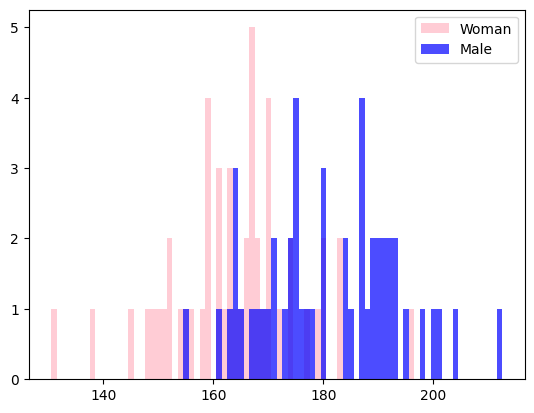

Height  131  138  145  148  149  150  151  152  154  155  ...  191  192  193  \
gender                                                    ...                  
female    1    1    1    1    1    1    1    2    1    1  ...    0    0    0   
male      0    0    0    0    0    0    0    0    0    1  ...    2    2    2   

Height  195  196  198  200  201  204  212  
gender                                     
female    0    1    0    0    0    0    0  
male      1    0    1    1    1    1    1  

[2 rows x 50 columns]
130 |   Men:0.0000|     Women:1.0000
135 |   Men:0.0|     Women:0.0
140 |   Men:0.0000|     Women:1.0000
145 |   Men:0.0000|     Women:1.0000
150 |   Men:0.0000|     Women:1.0000
155 |   Men:0.2500|     Women:0.7500
160 |   Men:0.1000|     Women:0.9000
165 |   Men:0.3333|     Women:0.6667
170 |   Men:0.3846|     Women:0.6154
175 |   Men:0.7500|     Women:0.2500
180 |   Men:0.5714|     Women:0.4286
185 |   Men:0.7778|     Women:0.2222
190 |   Men:1.0000|     Women:0.0000
195 |

In [132]:
#Fr bro just use R ffs  (Screw the original syntax, why not use pandas instead FFS)
#Naive Bayes Classifier Example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1=pd.read_table("Files\People's data.txt", delimiter=" ", header=None)
df=pd.DataFrame({"Height":  df1.iloc[:,2],
                 "Weight":  df1.iloc[:,3],
                 "gender":  df1.iloc[:,4]})

def roundedtofive(x, base=5):
    return base * round(x/base)

def nparangeroundedto5(min, max):
    return np.arange(roundedtofive(min), roundedtofive(max)+5, 5)

if __name__ == "__main__":
    #Bar Chart of height distribution between the two genders
    freq_table= pd.crosstab(df.gender, df.Height)
    plt.bar(freq_table.columns.values, freq_table[freq_table.index=="female"].values.reshape(-1), 1, color="pink", alpha= 0.8, label="Woman")
    plt.bar(freq_table.columns.values, freq_table[freq_table.index=="male"].values.reshape(-1), 1, color="blue", alpha= 0.7, label="Male")
    plt.legend(loc="upper right")
    plt.show()
    
    #What if we create a probability byt if the range between height is 5?
    print(freq_table)
    rangeround=nparangeroundedto5(freq_table.columns.values.min(), freq_table.columns.values.max())
    men=[];women=[]
    k=0
    for i in rangeround:
        a=0;b=0
        for j in freq_table.columns.values:
            temp=roundedtofive(j)
            if temp>i:
                break            
            elif (i==temp):
                a+=int(freq_table[j][freq_table.index=="male"].values)
                b+=int(freq_table[j][freq_table.index=="female"].values)
        men.append(a); women.append(b)
        
        #fuckingprobability
        if (men[k]==0 and women[k]==0):
            print(f'{i} |   Men:0.0|     Women:0.0')            
        else:
            print(f'{i} |   Men:{men[k]/(men[k]+women[k]):.4f}|     Women:{women[k]/(men[k]+women[k]):.4f}')
        k+=1